# Analysis of the excitation gap in superconducting Gallium 

#### Data sourced from: Heat capacity of Gallium in the normal and superconducting state. [N. Phillips, Phys. Rev. 134, A385 (1964)]
[DOI: https://doi.org/10.1103/PhysRev.134.A385](https://journals.aps.org/pr/abstract/10.1103/PhysRev.134.A385)


In [32]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline

In [33]:
f = open("Gallium.dat", "r")
T_sq = []
Cs_T = []
for lines in f:
    if lines[0] == "#":
        continue
    x = str.split(lines)
    T_sq.append(float(x[0]))
    Cs_T.append(float(x[1]))

f.close()


Sommerfield constant (superconductor) =  0.07077220996505429
Sommerfield constant (normal) =  0.596


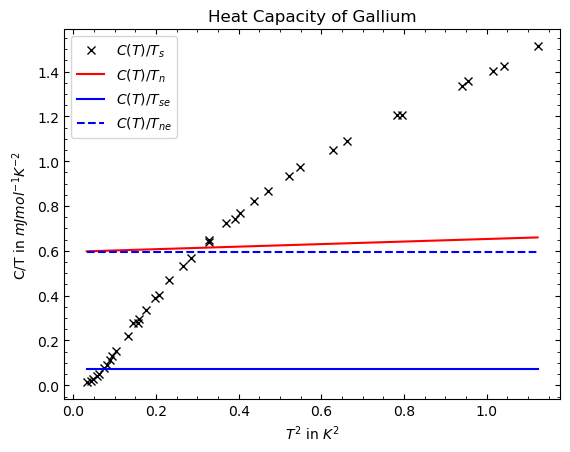

In [36]:
superconductor_heat_capacity = np.array(Cs_T)
temperature = np.array(T_sq)

# var. for normal heat capacity as given in N. Phillips, Phys. Rev. 134, A385 (1964)
normal_heat_capacity = [0.596 + 0.0568*T_sq for T_sq in temperature]

# func. for sommerfield constant (electronic contribution to heat capacity)
def f(x, a, b):
    return a + b*x

popt, pcov = curve_fit(f, temperature, superconductor_heat_capacity, p0=[0, 0.5])
print(f"Sommerfield constant (superconductor) = ", popt[0])

popt2 ,pcov2 = curve_fit(f, temperature, normal_heat_capacity, p0=[0, 0.5])
print(f"Sommerfield constant (normal) = ", popt2[0])

# list for electronic heat capacities
electronic_super_heat_capacity = popt[0]*(np.ones(len(temperature)))
electronic_normal_heat_capacity = popt2[0]*(np.ones(len(temperature)))

# plotting
plt.plot(temperature, superconductor_heat_capacity, "x", color="black", label=r"$C(T)/T_{s}$")
plt.plot(temperature, normal_heat_capacity, color="red", label=r"$C(T)/T_{n}$")
plt.plot(temperature, electronic_super_heat_capacity, color="blue", label=r"$C(T)/T_{se}$")
plt.plot(temperature, electronic_normal_heat_capacity, "--", color="blue", label=r"$C(T)/T_{ne}$")

plt.xlabel("$T^{2}$ in $K^{2}$")
plt.ylabel("C/T in $mJ mol^{-1} K^{-2}$")
plt.legend(loc="upper left")
plt.title("Heat Capacity of Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')



The electronic contribution to normal-state heat capacity at T_c =  0.6644729121654909


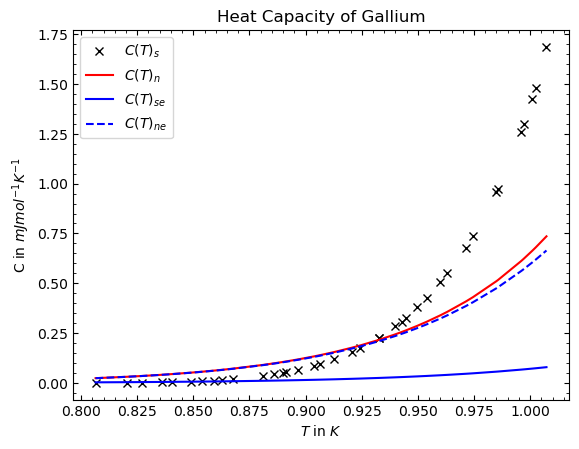

In [40]:
temperature = np.sqrt(temperature)

superconductor_heat_capacity = superconductor_heat_capacity*temperature
normal_heat_capacity = normal_heat_capacity*temperature
electronic_super_heat_capacity = electronic_super_heat_capacity*temperature
electronic_normal_heat_capacity = electronic_normal_heat_capacity*temperature

plt.plot(temperature, superconductor_heat_capacity, "x", color="black", label=r"$C(T)_{s}$")
plt.plot(temperature, normal_heat_capacity, color="red", label=r"$C(T)_{n}$")
plt.plot(temperature, electronic_super_heat_capacity, color="blue", label=r"$C(T)_{se}$")
plt.plot(temperature, electronic_normal_heat_capacity, "--", color="blue", label=r"$C(T)_{ne}$")
plt.xlabel("$T$ in $K$")
plt.ylabel("C in $mJ mol^{-1} K^{-1}$")
plt.legend(loc="upper left")
plt.title("Heat Capacity of Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

print("The electronic contribution to normal-state heat capacity at T_c = ", electronic_normal_heat_capacity[-1])

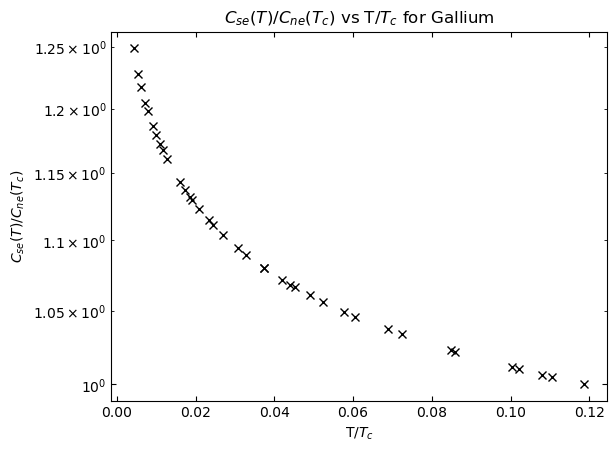

In [55]:
Cse_Cne = electronic_super_heat_capacity/electronic_normal_heat_capacity[-1]
Tc_T = temperature[-1]/temperature

plt.plot(Cse_Cne, Tc_T, "x", color="black")
plt.xlabel("T/$T_{c}$")
plt.ylabel("$C_{se}(T)$/$C_{ne}(T_{c})$")
plt.title("$C_{se}(T)$/$C_{ne}(T_{c})$ vs T/$T_{c}$ for Gallium")
plt.yscale('log')

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

plt.show()